<h1> HANDWRITTEN SIGNATURE VERIFICATION 
USING 
CONVOLUTION NEURAL NETWORK (CNN) </h1>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h2> Part 1 </h2>

<h4> 
    
**Problem Statement**  :  
    *The objective is to develop the handwritten verification system using latest advancement in deep learning. Input parameter to this system is pair of two signature in portable network graphics images (PNG) format and outputs the Boolean value (1 or 0).* <br>

**Abstract**   :   
    *We present the convolutional neural networks for feature extraction and supervised machine learning techniques for the verification of handwritten signatures. Raw images of signatures are used to train CNN models for extracting features along with data augmentation. CNN Architectures used are VGG16, Inception-v3, ResNet50, and Xception. The Extracted features are classified into two classes genuine or forgery using Euclidean distance, cosine similarity and supervised learning algorithm such as Logistic Regression, Random Forest, SVM and its variations. Data used for testing is extracted from ICDAR 2011 Signature Dataset and organized in pairwise fashion. The database contains signatures of 69 subjects.*   <br>
    
</h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import glob
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import applications
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import backend as K
import gc
from tensorflow.keras.models import Model
import pickle

In [3]:
train_dir="/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/Dataset/train"
test_dir="/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/Dataset/test"

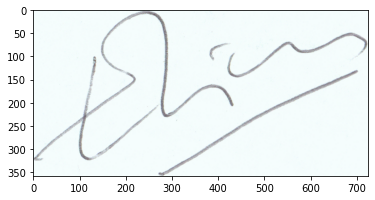

In [ ]:
img = plt.imread('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/Dataset/train/001/001_01.PNG')
plt.imshow(img)

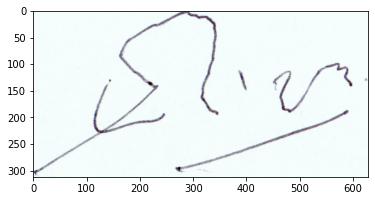

In [ ]:
img1 = plt.imread('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/Dataset/train/001_forg/0119001_01.png')
plt.imshow(img1)

In [2]:
SIZE = 224

In [3]:
train_data_names = []
test_data_names = []

train_data = []
train_labels = []

for per in os.listdir('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/Dataset/train'):
    for data in glob.glob('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/Dataset/train/'+per+'/*.*'):
        
        train_data_names.append(data)
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE,SIZE))
        train_data.append([img])
        if per[-1]=='g':
            train_labels.append(np.array(1))
        else:
            train_labels.append(np.array(0))

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

#Test Data

test_data = []
test_labels = []

for per in os.listdir('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/Dataset/test'):
    for data in glob.glob('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/sign_data/Dataset/test/'+per+'/*.*'):
        test_data_names.append(data)
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE,SIZE))
        test_data.append([img])
        if per[-1]=='g':
            test_labels.append(np.array(1))
        else:
            test_labels.append(np.array(0))

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
with open('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/train_data_names.pkl', 'wb') as fp:
    pickle.dump(train_data_names, fp)

with open('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/test_data_names.pkl', 'wb') as fp:
    pickle.dump(test_data_names, fp)

In [4]:
# Categorical labels
#print(train_labels)
train_labels = to_categorical(train_labels)
#print(train_data.shape)
# Reshaping
train_data = train_data.reshape(-1, SIZE,SIZE, 3)
test_data = test_data.reshape(-1, SIZE,SIZE, 3)

<h2> The Proposed Methodology </h2>

<h4>
1. Dataset <br><br>
2. Proposed System<br><br>
3. Feature Extraction<br><br>
4. Feature Selection<br><br>
5. Classification<br>
</h4>

<h3> Feature Extraction </h3>

1. Convolution neural network (CNN) are popular neural network architectures for working on image dataset. 
2. Total 16 models were trained to compare the accuracy.
3. 4 Architectures Used for Feature Extraction are:-
- VGG16
- Inception-v3
- ResNet-50
- Xception
4. Optimizers used to compile the models are:-
- Stochastic gradient descent (SGD)
- Root Mean Square Propagation (RMSprop
- Adaptive Gradient Algorithm (Adagrad) 
- Active Design and Analysis Modelling (Adam)

<h1> Parameters </h1>

In [5]:
input_ = (224,224,3)
EPOCHS = 20
BS = 64
output_ = 2

<h3> Feature Extraction </h3>

<h1> VGG16 - ADAM </h1>

58889256/58889256 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16_input (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,137,986
Trainable params: 21,137,986
Non-trainable params: 0
__________________________________________________

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
19/19 [==============================] - 43s 1s/step - loss: 0.6177 - accuracy: 0.6820 - val_loss: 5.0119 - val_accuracy: 0.5010
Epoch 2/20
19/19 [==============================] - 19s 1s/step - loss: 1.1046 - accuracy: 0.5191 - val_loss: 0.6906 - val_accuracy: 0.5010
Epoch 3/20
19/19 [==============================] - 20s 1s/step - loss: 0.6816 - accuracy: 0.5572 - val_loss: 0.6749 - val_accuracy: 0.5515
Epoch 4/20
19/19 [==============================] - 21s 1s/step - loss: 0.6693 - accuracy: 0.6031 - val_loss: 0.6970 - val_accuracy: 0.5010
Epoch 5/20
19/19 [==============================] - 21s 1s/step - loss: 0.6548 - accuracy: 0.5858 - val_loss: 0.6190 - val_accuracy: 0.5697
Epoch 6/20
19/19 [==============================] - 20s 1s/step - loss: 0.4909 - accuracy: 0.7626 - val_loss: 0.2834 - val_accuracy: 0.9051
Epoch 7/20
19/19 [==============================] - 21s 1s/step - loss: 0.4017 - accuracy: 0.8440 - val_loss: 0.3851 - val_accuracy: 0.8323
Epoch 8/20
19/19 [==

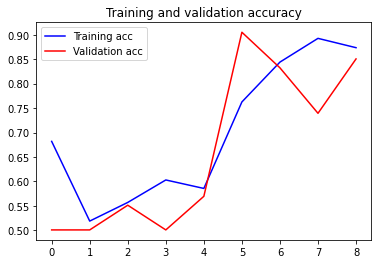

<Figure size 432x288 with 0 Axes>

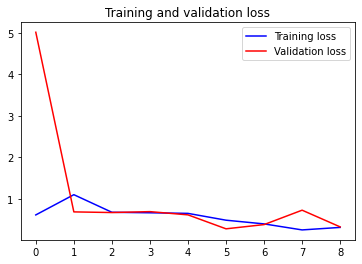

16/16 [==============================] - 5s 322ms/step


In [ ]:
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/vgg16_adam/VGG16_Adam_train', intermediate_output_train)
np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/vgg16_adam/VGG16_Adam_test', intermediate_output_test)

<h1> VGG16 - SGD </h1>

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16_input (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               6422784   
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,137,986
Trainable params: 21,137,986
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
19/19 [==============================] - 22s 1s/step - loss: 0.6984 - accuracy: 0.5849 - val_loss: 0.7238 - val_accuracy: 0.4424
Epoch 2/20
19/19 [==============================] - 22s 1s/step - loss: 0.6791 - accuracy: 0.5745 - val_loss: 0.7144 - val_accuracy: 0.5475
Epoch 3/20
19/19 [==============================] - 21s 1s/step - loss: 0.6605 - accuracy: 0.6205 - val_loss: 0.7385 - val_accuracy: 0.5273
Epoch 4/20
19/19 [==============================] - 21s 1s/step - loss: 0.6476 - accuracy: 0.6386 - val_loss: 0.7300 - val_accuracy: 0.4949
Epoch 5/20
19/19 [==============================] - 21s 1s/step - loss: 0.6378 - accuracy: 0.6482 - val_loss: 0.6845 - val_accuracy: 0.5899
Epoch 6/20
19/19 [==============================] - 22s 1s/step - loss: 0.6193 - accuracy: 0.6932 - val_loss: 0.7151 - val_accuracy: 0.5131
Epoch 7/20
19/19 [==============================] - 21s 1s/step - loss: 0.6097 - accuracy: 0.6984 - val_loss: 0.6720 - val_accuracy: 0.6101
Epoch 8/20
19/19 [==

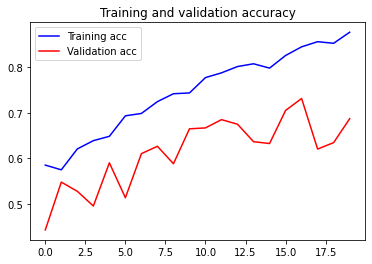

<Figure size 432x288 with 0 Axes>

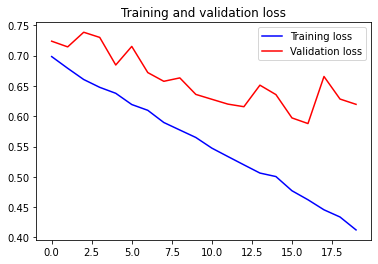

16/16 [==============================] - 3s 172ms/step


In [ ]:
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/vgg16_sgd/VGG16_SGD_train', intermediate_output_train)
np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/vgg16_sgd/VGG16_SGD_test', intermediate_output_test)

<h1> VGG16 - RMSProp </h1>

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16_input (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               6422784   
                                                                 
 dense_5 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,137,986
Trainable params: 21,137,986
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
19/19 [==============================] - 22s 1s/step - loss: 0.8332 - accuracy: 0.5199 - val_loss: 0.6879 - val_accuracy: 0.5172
Epoch 2/20
19/19 [==============================] - 22s 1s/step - loss: 0.6851 - accuracy: 0.5511 - val_loss: 0.6628 - val_accuracy: 0.6242
Epoch 3/20
19/19 [==============================] - 21s 1s/step - loss: 0.6924 - accuracy: 0.6057 - val_loss: 1.4349 - val_accuracy: 0.5010
Epoch 4/20
19/19 [==============================] - 20s 1s/step - loss: 0.8298 - accuracy: 0.5884 - val_loss: 0.7077 - val_accuracy: 0.5010
Epoch 5/20
19/19 [==============================] - 21s 1s/step - loss: 0.6066 - accuracy: 0.6768 - val_loss: 20.6993 - val_accuracy: 0.5010
Epoch 5: early stopping


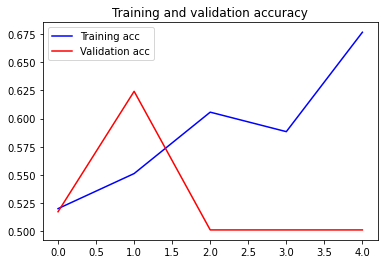

<Figure size 432x288 with 0 Axes>

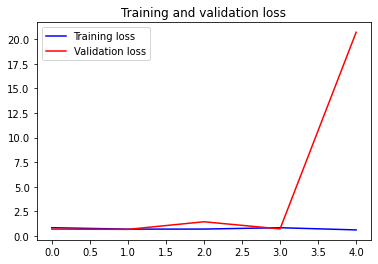

16/16 [==============================] - 3s 171ms/step


In [ ]:
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/vgg16_rmsprop/VGG16_RMSprop_train', intermediate_output_train)
np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/vgg16_rmsprop/VGG16_RMSprop_test', intermediate_output_test)

<h1> VGG16 - Adagrad </h1>

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16_input (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               6422784   
                                                                 
 dense_7 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,137,986
Trainable params: 21,137,986
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adagrad.py:77: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


Epoch 1/20
19/19 [==============================] - 22s 1s/step - loss: 0.7177 - accuracy: 0.5234 - val_loss: 0.7003 - val_accuracy: 0.5232
Epoch 2/20
19/19 [==============================] - 22s 1s/step - loss: 0.6726 - accuracy: 0.5858 - val_loss: 0.9234 - val_accuracy: 0.4990
Epoch 3/20
19/19 [==============================] - 21s 1s/step - loss: 0.6516 - accuracy: 0.6170 - val_loss: 0.7688 - val_accuracy: 0.5071
Epoch 4/20
19/19 [==============================] - 21s 1s/step - loss: 0.6218 - accuracy: 0.6603 - val_loss: 0.6309 - val_accuracy: 0.6586
Epoch 5/20
19/19 [==============================] - 22s 1s/step - loss: 0.5813 - accuracy: 0.7348 - val_loss: 0.6475 - val_accuracy: 0.5859
Epoch 6/20
19/19 [==============================] - 22s 1s/step - loss: 0.5527 - accuracy: 0.7660 - val_loss: 0.5778 - val_accuracy: 0.7172
Epoch 7/20
19/19 [==============================] - 21s 1s/step - loss: 0.5137 - accuracy: 0.8172 - val_loss: 0.5624 - val_accuracy: 0.7091
Epoch 8/20
19/19 [==

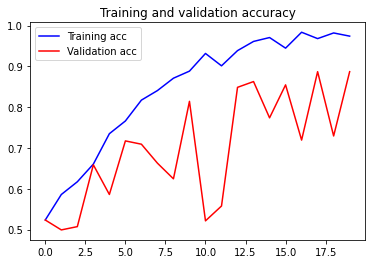

<Figure size 432x288 with 0 Axes>

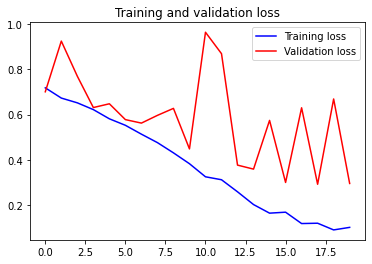

16/16 [==============================] - 3s 174ms/step


In [ ]:
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adagrad(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/vgg16_adagrad/VGG16_Adagrad_train', intermediate_output_train)
np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/vgg16_adagrad/VGG16_Adagrad_test', intermediate_output_test)

<h1> Inception_v3 - ADAM </h1>

87910968/87910968 [==============================] - 3s 0us/step
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3_input (InputLa  [(None, 224, 224, 3)]    0         
 yer)                                                            
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_4 (Flatten)         (None, 51200)             0         
                                                                 
 dense_8 (Dense)             (None, 256)               13107456  
                                                                 
 dense_9 (Dense)             (None, 2)                 514       
                                                                 
Total params: 34,910,754
Trainable params: 34,876,322
Non-tr

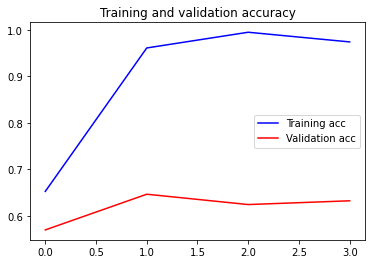

<Figure size 432x288 with 0 Axes>

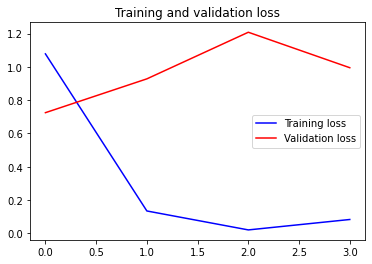

16/16 [==============================] - 2s 140ms/step


In [ ]:
base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/inceptionv3_adam/InceptionV3_Adam_train', intermediate_output_train)
np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/inceptionv3_adam/InceptionV3_Adam_test', intermediate_output_test)

<h1> Inception_v3 - SGD </h1>

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3_input (InputLa  [(None, 224, 224, 3)]    0         
 yer)                                                            
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_5 (Flatten)         (None, 51200)             0         
                                                                 
 dense_10 (Dense)            (None, 256)               13107456  
                                                                 
 dense_11 (Dense)            (None, 2)                 514       
                                                                 
Total params: 34,910,754
Trainable params: 34,876,322
Non-trainable params: 34,432
_________________________________________

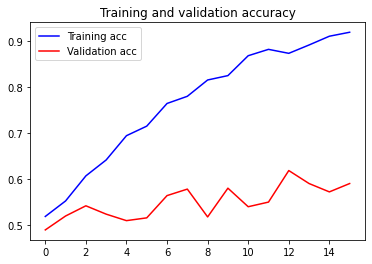

<Figure size 432x288 with 0 Axes>

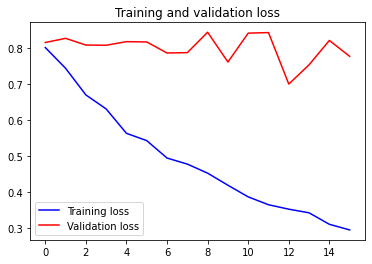

16/16 [==============================] - 1s 64ms/step


In [ ]:
base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/inceptionv3_sgd/InceptionV3_SGD_train', intermediate_output_train)
np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/inceptionv3_sgd/InceptionV3_SGD_test', intermediate_output_test)

<h1> Inception_v3 - RMSprop </h1>

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3_input (InputLa  [(None, 224, 224, 3)]    0         
 yer)                                                            
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_6 (Flatten)         (None, 51200)             0         
                                                                 
 dense_12 (Dense)            (None, 256)               13107456  
                                                                 
 dense_13 (Dense)            (None, 2)                 514       
                                                                 
Total params: 34,910,754
Trainable params: 34,876,322
Non-trainable params: 34,432
_________________________________________

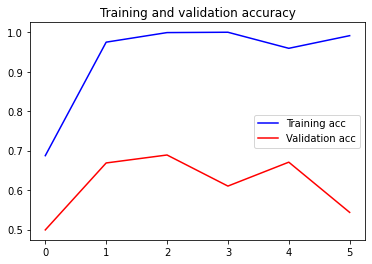

<Figure size 432x288 with 0 Axes>

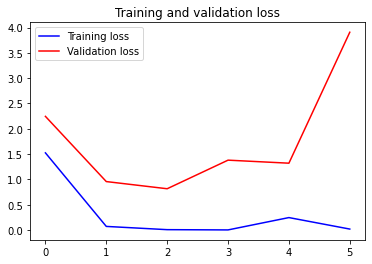

16/16 [==============================] - 1s 66ms/step


In [ ]:
base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/inceptionv3_rmsprop/InceptionV3_RMSprop_train', intermediate_output_train)
np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/inceptionv3_rmsprop/InceptionV3_RMSprop_test', intermediate_output_test)

<h1> Inception_v3 - Adagrad </h1>

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3_input (InputLa  [(None, 224, 224, 3)]    0         
 yer)                                                            
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_7 (Flatten)         (None, 51200)             0         
                                                                 
 dense_14 (Dense)            (None, 256)               13107456  
                                                                 
 dense_15 (Dense)            (None, 2)                 514       
                                                                 
Total params: 34,910,754
Trainable params: 34,876,322
Non-trainable params: 34,432
_________________________________________

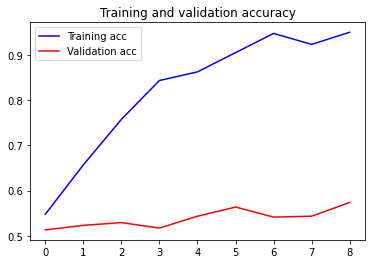

<Figure size 432x288 with 0 Axes>

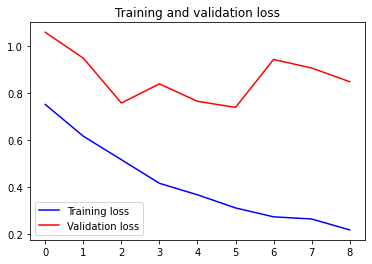

16/16 [==============================] - 1s 68ms/step


In [ ]:
base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adagrad(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/inceptionv3_adagrad/InceptionV3_Adagrad_train', intermediate_output_train)
np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/inceptionv3_adagrad/InceptionV3_Adagrad_test', intermediate_output_test)

<h1> ResNet50 - Adam </h1>

94765736/94765736 [==============================] - 3s 0us/step
Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50_input (InputLayer)  [(None, 224, 224, 3)]    0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_8 (Flatten)         (None, 100352)            0         
                                                                 
 dense_16 (Dense)            (None, 256)               25690368  
                                                                 
 dense_17 (Dense)            (None, 2)                 514       
                                                                 
Total params: 49,278,594
Trainable params: 49,225,474
Non-trainable params: 53,120
__________________________________________

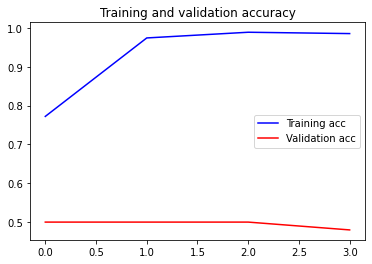

<Figure size 432x288 with 0 Axes>

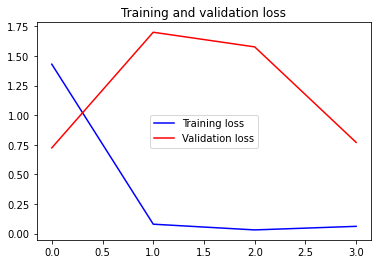

In [ ]:
base_model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/resnet50_adam/ResNet50_Adam_train', intermediate_output_train)
np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/resnet50_adam/ResNet50_Adam_test', intermediate_output_test)

<h1>  ResNet50 - SGD </h1>

94765736/94765736 [==============================] - 5s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50_input (InputLayer)  [(None, 224, 224, 3)]    0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 49,278,594
Trainable params: 49,225,474
Non-trainable params: 53,120
_____________________________________________

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
19/19 [==============================] - 36s 868ms/step - loss: 0.9302 - accuracy: 0.5823 - val_loss: 0.9756 - val_accuracy: 0.4990
Epoch 2/20
19/19 [==============================] - 12s 645ms/step - loss: 0.4724 - accuracy: 0.7868 - val_loss: 0.9461 - val_accuracy: 0.4990
Epoch 3/20
19/19 [==============================] - 12s 645ms/step - loss: 0.2791 - accuracy: 0.9012 - val_loss: 1.5709 - val_accuracy: 0.4990
Epoch 4/20
19/19 [==============================] - 12s 652ms/step - loss: 0.1987 - accuracy: 0.9298 - val_loss: 0.8663 - val_accuracy: 0.4990
Epoch 5/20
19/19 [==============================] - 12s 658ms/step - loss: 0.1337 - accuracy: 0.9714 - val_loss: 1.2752 - val_accuracy: 0.4990
Epoch 6/20
19/19 [==============================] - 12s 649ms/step - loss: 0.1077 - accuracy: 0.9809 - val_loss: 2.1199 - val_accuracy: 0.4990
Epoch 7/20
19/19 [==============================] - 12s 651ms/step - loss: 0.0948 - accuracy: 0.9757 - val_loss: 1.6677 - val_accuracy: 0.4990

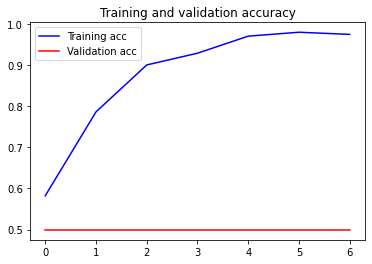

<Figure size 432x288 with 0 Axes>

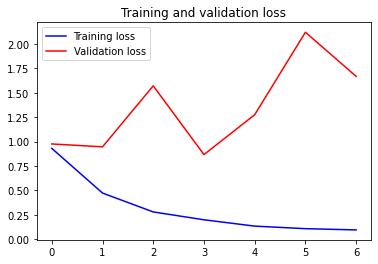

16/16 [==============================] - 2s 123ms/step


In [11]:
base_model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/ResNet50_SGD_train', intermediate_output_train)
np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/ResNet50_SGD_test', intermediate_output_test)

<h1> ResNet50 - RMSprop </h1>

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50_input (InputLayer)  [(None, 224, 224, 3)]    0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               25690368  
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 49,278,594
Trainable params: 49,225,474
Non-trainable params: 53,120
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
19/19 [==============================] - 23s 715ms/step - loss: 4.0754 - accuracy: 0.7773 - val_loss: 1.3421 - val_accuracy: 0.4990
Epoch 2/20
19/19 [==============================] - 13s 665ms/step - loss: 0.0371 - accuracy: 0.9879 - val_loss: 4.6345 - val_accuracy: 0.4990
Epoch 3/20
19/19 [==============================] - 13s 668ms/step - loss: 0.0860 - accuracy: 0.9723 - val_loss: 13.4631 - val_accuracy: 0.4990
Epoch 4/20
19/19 [==============================] - 13s 670ms/step - loss: 0.0654 - accuracy: 0.9783 - val_loss: 7.9389 - val_accuracy: 0.4990
Epoch 4: early stopping


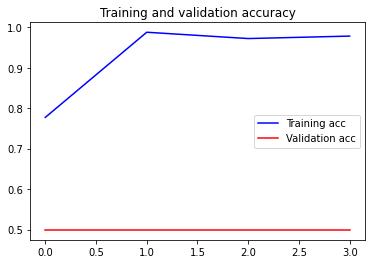

<Figure size 432x288 with 0 Axes>

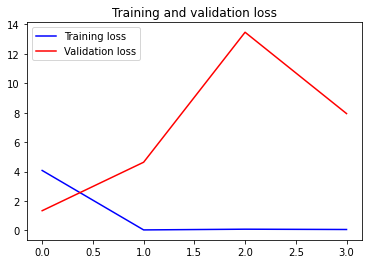

16/16 [==============================] - 1s 86ms/step


In [12]:
base_model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/ResNet50_RMSprop_train', intermediate_output_train)
np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/ResNet50_RMSprop_test', intermediate_output_test)

<h1> ResNet50 - Adagrad </h1>

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50_input (InputLayer)  [(None, 224, 224, 3)]    0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_4 (Dense)             (None, 256)               25690368  
                                                                 
 dense_5 (Dense)             (None, 2)                 514       
                                                                 
Total params: 49,278,594
Trainable params: 49,225,474
Non-trainable params: 53,120
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adagrad.py:77: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


Epoch 1/20
19/19 [==============================] - 18s 719ms/step - loss: 0.7237 - accuracy: 0.6854 - val_loss: 0.6671 - val_accuracy: 0.5980
Epoch 2/20
19/19 [==============================] - 13s 662ms/step - loss: 0.1872 - accuracy: 0.9367 - val_loss: 0.7377 - val_accuracy: 0.5091
Epoch 3/20
19/19 [==============================] - 13s 665ms/step - loss: 0.0670 - accuracy: 0.9931 - val_loss: 0.7515 - val_accuracy: 0.4808
Epoch 4/20
19/19 [==============================] - 13s 667ms/step - loss: 0.0492 - accuracy: 0.9939 - val_loss: 0.7939 - val_accuracy: 0.3515
Epoch 4: early stopping


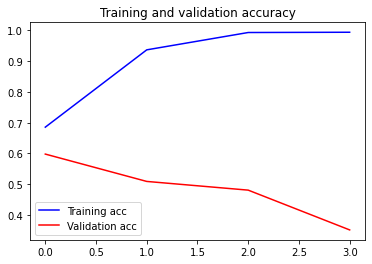

<Figure size 432x288 with 0 Axes>

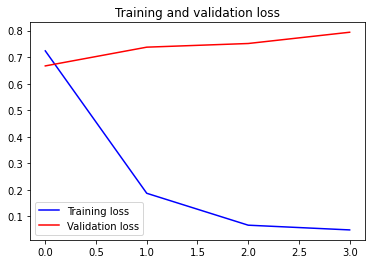

16/16 [==============================] - 1s 85ms/step


In [13]:
base_model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adagrad(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/ResNet50_Adagrad_train', intermediate_output_train)
np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/ResNet50_Adagrad_test', intermediate_output_test)

<h1> Xception - Adam </h1>

83683744/83683744 [==============================] - 4s 0us/step
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception_input (InputLayer)  [(None, 224, 224, 3)]    0         
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 dense_6 (Dense)             (None, 256)               25690368  
                                                                 
 dense_7 (Dense)             (None, 2)                 514       
                                                                 
Total params: 46,552,362
Trainable params: 46,497,834
Non-trainable params: 54,528
___________________________________________

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
19/19 [==============================] - 36s 1s/step - loss: 1.0586 - accuracy: 0.5407 - val_loss: 0.7148 - val_accuracy: 0.4990
Epoch 2/20
19/19 [==============================] - 24s 1s/step - loss: 0.6027 - accuracy: 0.5607 - val_loss: 0.8180 - val_accuracy: 0.4990
Epoch 3/20
19/19 [==============================] - 24s 1s/step - loss: 0.4118 - accuracy: 0.7028 - val_loss: 0.9064 - val_accuracy: 0.4970
Epoch 4/20
19/19 [==============================] - 24s 1s/step - loss: 0.3055 - accuracy: 0.9515 - val_loss: 1.4014 - val_accuracy: 0.5051
Epoch 4: early stopping


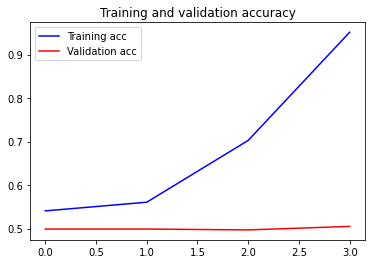

<Figure size 432x288 with 0 Axes>

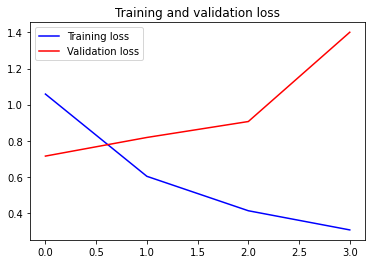

16/16 [==============================] - 3s 186ms/step


In [14]:
base_model = applications.Xception(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/Xception_Adam_train', intermediate_output_train)
np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/Xception_Adam_test', intermediate_output_test)

<h1> Xception - SGD </h1>

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception_input (InputLayer)  [(None, 224, 224, 3)]    0         
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 46,552,362
Trainable params: 46,497,834
Non-trainable params: 54,528
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
19/19 [==============================] - 42s 1s/step - loss: 0.6853 - accuracy: 0.5728 - val_loss: 0.6976 - val_accuracy: 0.5354
Epoch 2/20
19/19 [==============================] - 22s 1s/step - loss: 0.6667 - accuracy: 0.5927 - val_loss: 0.6896 - val_accuracy: 0.5616
Epoch 3/20
19/19 [==============================] - 24s 1s/step - loss: 0.6374 - accuracy: 0.6638 - val_loss: 0.6987 - val_accuracy: 0.5515
Epoch 4/20
19/19 [==============================] - 23s 1s/step - loss: 0.6176 - accuracy: 0.6759 - val_loss: 0.7130 - val_accuracy: 0.5293
Epoch 5/20
19/19 [==============================] - 24s 1s/step - loss: 0.5981 - accuracy: 0.7123 - val_loss: 0.7178 - val_accuracy: 0.5131
Epoch 5: early stopping


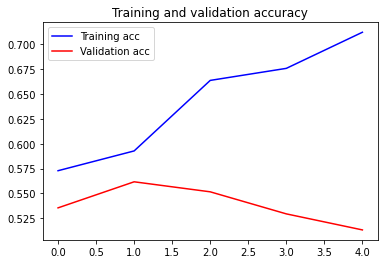

<Figure size 432x288 with 0 Axes>

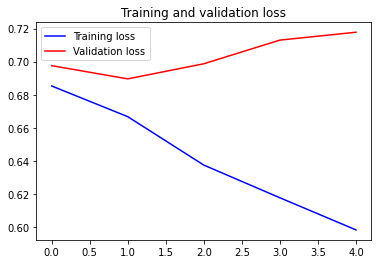

16/16 [==============================] - 3s 182ms/step


In [6]:
base_model = applications.Xception(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/Xception_SGD_train', intermediate_output_train)
np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/Xception_SGD_test', intermediate_output_test)

<h1> Xception - RMSprop </h1>

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception_input (InputLayer)  [(None, 224, 224, 3)]    0         
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               25690368  
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 46,552,362
Trainable params: 46,497,834
Non-trainable params: 54,528
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
19/19 [==============================] - 32s 1s/step - loss: 1.2825 - accuracy: 0.5641 - val_loss: 0.7474 - val_accuracy: 0.4990
Epoch 2/20
19/19 [==============================] - 24s 1s/step - loss: 0.2497 - accuracy: 0.9203 - val_loss: 1.3301 - val_accuracy: 0.5313
Epoch 3/20
19/19 [==============================] - 24s 1s/step - loss: 0.0806 - accuracy: 0.9801 - val_loss: 1.2704 - val_accuracy: 0.5596
Epoch 4/20
19/19 [==============================] - 24s 1s/step - loss: 0.0655 - accuracy: 0.9879 - val_loss: 2.4345 - val_accuracy: 0.5010
Epoch 4: early stopping


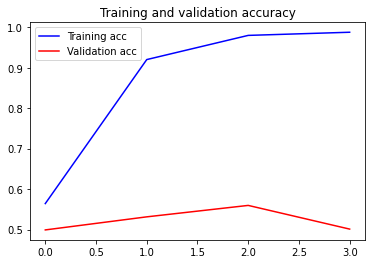

<Figure size 432x288 with 0 Axes>

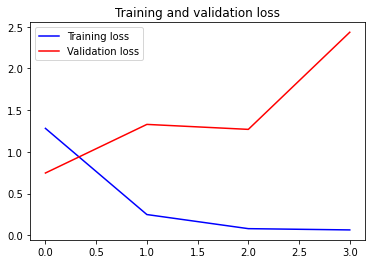

16/16 [==============================] - 2s 122ms/step


In [7]:
base_model = applications.Xception(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/Xception_RMSprop_train', intermediate_output_train)
np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/Xception_RMSprop_test', intermediate_output_test)

<h1> Xception - Adagrad </h1>

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception_input (InputLayer)  [(None, 224, 224, 3)]    0         
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_4 (Dense)             (None, 256)               25690368  
                                                                 
 dense_5 (Dense)             (None, 2)                 514       
                                                                 
Total params: 46,552,362
Trainable params: 46,497,834
Non-trainable params: 54,528
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adagrad.py:77: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


Epoch 1/20
19/19 [==============================] - 28s 1s/step - loss: 0.6774 - accuracy: 0.5875 - val_loss: 0.7885 - val_accuracy: 0.4848
Epoch 2/20
19/19 [==============================] - 24s 1s/step - loss: 0.6184 - accuracy: 0.6733 - val_loss: 0.7577 - val_accuracy: 0.4929
Epoch 3/20
19/19 [==============================] - 24s 1s/step - loss: 0.5610 - accuracy: 0.7574 - val_loss: 0.7619 - val_accuracy: 0.5010
Epoch 4/20
19/19 [==============================] - 24s 1s/step - loss: 0.5170 - accuracy: 0.7998 - val_loss: 0.7122 - val_accuracy: 0.5010
Epoch 5/20
19/19 [==============================] - 24s 1s/step - loss: 0.4823 - accuracy: 0.8501 - val_loss: 0.8293 - val_accuracy: 0.5111
Epoch 6/20
19/19 [==============================] - 24s 1s/step - loss: 0.4471 - accuracy: 0.8648 - val_loss: 0.7503 - val_accuracy: 0.5394
Epoch 7/20
19/19 [==============================] - 24s 1s/step - loss: 0.4002 - accuracy: 0.9055 - val_loss: 1.0926 - val_accuracy: 0.4990
Epoch 7: early stopp

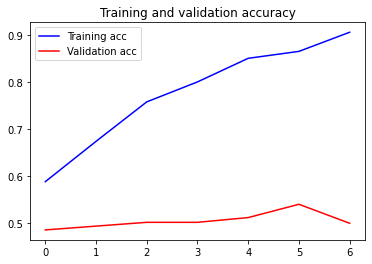

<Figure size 432x288 with 0 Axes>

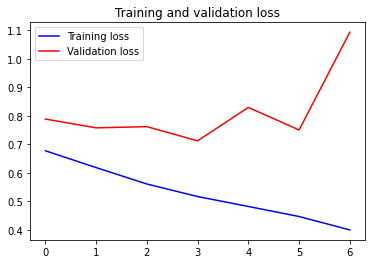

16/16 [==============================] - 2s 124ms/step


In [8]:
base_model = applications.Xception(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adagrad(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/Xception_Adagrad_train', intermediate_output_train)
np.save('/content/drive/MyDrive/Image_forensics/final_project_image_forensics/Handwritten_Signature_Feature_Extraction/re_arranged_data/Xception_Adagrad_test', intermediate_output_test)

# Feature Selection

1. The first observation from above figures VGG16 architecture outperformed all other architectures and features from the models which can be used for classification are with at least 87% training accuracy and 90% validation accuracy. 
2. Four models which we choose to test our classification algorithms are:- 
- VGG16 - Adam
- VGG16 – RMSprop
- Inception-v3 – Adam
- Inception-v3 – Adagrad